In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import plotly.graph_objects as go

# Import dataset and cleaning

In [2]:
df2018 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project_Spotify/my_spotify_2018.csv')
df2019 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project_Spotify/my_spotify_2019.csv')
df2020 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project_Spotify/my_spotify_2020.csv')
df2021 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project_Spotify/my_spotify_2021.csv')
df2022 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project_Spotify/my_spotify_2022.csv')

In [3]:
df2018['year_playlist'] = 2018
df2019['year_playlist'] = 2019
df2020['year_playlist'] = 2020
df2021['year_playlist'] = 2021
df2022['year_playlist'] = 2022


In [4]:
list_years = [df2018  ,df2019 , df2020 , df2021 , df2022]

In [5]:
df_historical = pd.concat(list_years, ignore_index=True )

In [6]:
del df_historical['Unnamed: 0']

In [7]:
df_historical

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,Timeframe
0,Fresas con nata,Fresas con nata,48sq0JdNEbXhQTdAorTzC9,Ayax y Prok,210000,0,0.824,0.617,8,-10.429,1,0.4370,0.126000,0.000000,0.1050,0.814,115.899,2018,NaN
1,Amén,Pa'l Coche,1PLxoOKyLKqicE5ErhrzkF,Cruz Cafuné,191478,42,0.685,0.480,2,-10.174,0,0.3350,0.130000,0.000000,0.1190,0.440,183.973,2018,NaN
2,Llórame - Acústico,Llórame (Acústico),1eFx4b7oW6VGtxGBz6aTrW,Zetazen,233453,45,0.537,0.468,6,-8.551,1,0.0606,0.946000,0.000000,0.0980,0.306,102.725,2018,NaN
3,Nit salvatge,Nit salvatge,3TwSlfvFPPoz0K1yL1Ujxn,Smoking Souls,259833,40,0.587,0.675,10,-6.734,1,0.0313,0.000089,0.000030,0.0984,0.382,109.978,2018,NaN
4,Amorfoda,Amorfoda,3ITvHA9zhZZdBJsOsAUegF,Bad Bunny,155675,0,0.742,0.432,9,-7.539,0,0.0615,0.984000,0.000058,0.0796,0.252,148.005,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Rockadown Subway Session,Rockadown Subway Session,3bdhZxL276JwNlNsQgu51s,Vanupié,214041,0,0.650,0.648,6,-6.694,0,0.3390,0.525000,0.000000,0.6830,0.792,140.607,2022,long term
546,Je veux,Zaz,734dz1YaFITwawPpM25fSt,Zaz,215933,68,0.525,0.807,2,-6.366,0,0.0725,0.251000,0.000000,0.0504,0.741,155.397,2022,long term
547,Redemption Song,Uprising,26PwuMotZqcczKLHi4Htz3,Bob Marley & The Wailers,233560,69,0.671,0.256,7,-10.743,1,0.0387,0.608000,0.000000,0.0737,0.694,115.871,2022,long term
548,Last Kiss,Last Kiss,0QnONzv3TvHAWk294h6DaQ,Pearl Jam,195466,71,0.622,0.692,7,-6.970,1,0.0276,0.363000,0.000158,0.1930,0.774,112.053,2022,long term


In [8]:
# New column in seconds, drop miliseconds
df_historical['duration_ms'] = round(df_historical['duration']/1000,0)
df_historical.drop("duration",axis=1, inplace=True)

In [9]:
df_historical.head()

,track_name,album,track_id,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,Timeframe,duration_ms
0,Fresas con nata,Fresas con nata,48sq0JdNEbXhQTdAorTzC9,Ayax y Prok,0,0.824,0.617,8,-10.429,1,0.4370,0.126000,0.000000,0.1050,0.814,115.899,2018,NaN,210.0
1,Amén,Pa'l Coche,1PLxoOKyLKqicE5ErhrzkF,Cruz Cafuné,42,0.685,0.480,2,-10.174,0,0.3350,0.130000,0.000000,0.1190,0.440,183.973,2018,NaN,191.0
2,Llórame - Acústico,Llórame (Acústico),1eFx4b7oW6VGtxGBz6aTrW,Zetazen,45,0.537,0.468,6,-8.551,1,0.0606,0.946000,0.000000,0.0980,0.306,102.725,2018,NaN,233.0
3,Nit salvatge,Nit salvatge,3TwSlfvFPPoz0K1yL1Ujxn,Smoking Souls,40,0.587,0.675,10,-6.734,1,0.0313,0.000089,0.000030,0.0984,0.382,109.978,2018,NaN,260.0
4,Amorfoda,Amorfoda,3ITvHA9zhZZdBJsOsAUegF,Bad Bunny,0,0.742,0.432,9,-7.539,0,0.0615,0.984000,0.000058,0.0796,0.252,148.005,2018,NaN,156.0


In [10]:
df_historical.isna().sum()

track_name            0
album                 0
track_id              0
artist                0
popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
year_playlist         0
Timeframe           400
duration_ms           0
dtype: int64

In [11]:
df_historical.columns

Index(['track_name', 'album', 'track_id', 'artist', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year_playlist', 'Timeframe', 'duration_ms'],
      dtype='object')

In [12]:
del df_historical['Timeframe']

In [13]:
df_duplic = df_historical[df_historical.duplicated()]

In [14]:
print(df_duplic)
#make sense to have duplicates in some of the last rows because the last 150 songs are wrapped from my short,mid and long term of songs that I'm currently listening. (API of spotify)

                                      track_name  \
450                             No Me digas Nada   
451        Quevedo: Bzrp Music Sessions, Vol. 52   
453                              Ahora y Siempre   
455                                      Nonstop   
460                                 Buenos Genes   
462                            Los mismos clavos   
467                             Wild Irish Roses   
472                               Duerme Conmigo   
480                     Won't Bite (feat. Smino)   
485                                     Everlong   
486                                      My Hero   
498                              MAN ON THE MOON   
508                             No Me digas Nada   
512        Quevedo: Bzrp Music Sessions, Vol. 52   
538  Livin It Up (with Post Malone & A$AP Rocky)   
539                              Ahora y Siempre   

                                     album                track_id  \
450                       No Me digas Nada  1

In [15]:
df_historical.drop_duplicates(inplace=True)

In [16]:
df_historical.shape

(534, 18)

Text(0, 0.5, 'Number of songs')

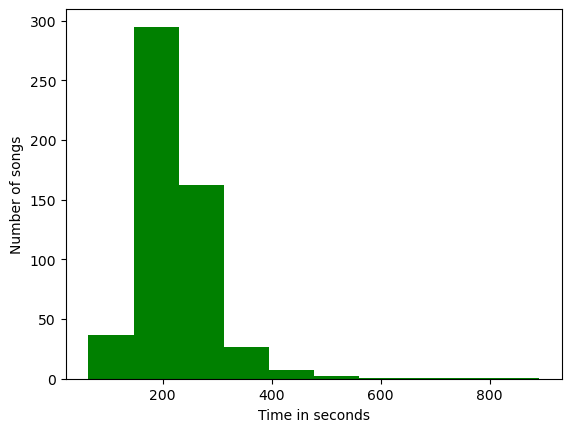

In [17]:
plt.hist(df_historical['duration_ms'], color = 'green')
plt.xlabel('Time in seconds')
plt.ylabel('Number of songs')

Text(0, 0.5, 'Number of songs')

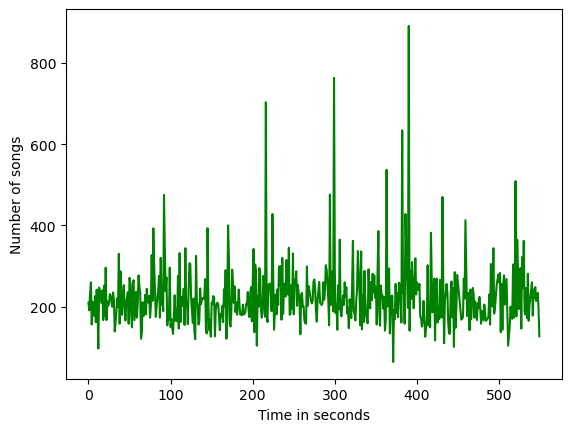

In [18]:
plt.plot(df_historical['duration_ms'], color = 'green')
  
plt.xlabel('Time in seconds')
plt.ylabel('Number of songs')

In [19]:
#df_historical.to_csv('my_historic_spotify.csv')

# EDA

In [20]:
#df_historical= pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_historic_spotify.csv')

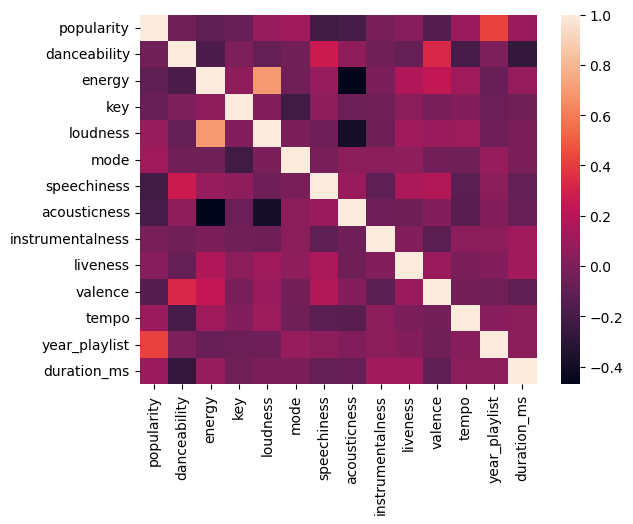

In [21]:
sns.heatmap(df_historical.corr());

In [22]:
(alt.
  Chart(df_historical).
  mark_bar().
  encode(alt.X('tempo:Q', bin=True), y='count()').
  properties(height=300, width=400).configure_mark(
    opacity=0.2,
    color='green'))

  #The arguments in the encode function indicates that the tempo column will be divided into 
  # bins and the number of observations in each bin will be counted.
  

alt.Chart(...)

In [23]:
# It seems like the tempo variable can be converted to a categorical variable that contains 3 categories. 
# Pandas has the cut and qcut functions for such tasks.
df_historical['tempo_str'] = pd.cut(df_historical['tempo'], bins=3, 
labels=['low','medium','high'])
df_historical.tempo_str.value_counts()

low       288
medium    184
high       62
Name: tempo_str, dtype: int64

In [24]:
most_played_artists_by_count = df_historical.groupby(by='artist')['track_name'].count().sort_values(ascending=False)[:15]

In [25]:

# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show()


In [26]:
df_historical.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,duration_ms
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,37.951311,0.660124,0.662915,5.280899,-7.259657,0.614232,0.159924,0.307077,0.010549,0.179453,0.555013,116.765783,2020.127341,224.262172
std,27.201104,0.144443,0.176254,3.570744,2.785005,0.487233,0.133036,0.275053,0.063334,0.139773,0.225627,30.076027,1.454334,76.873441
min,0.000000,0.167000,0.043400,0.000000,-31.042000,0.000000,0.024200,0.000014,0.000000,0.028000,0.059600,70.554000,2018.000000,64.000000
25%,1.000000,0.559250,0.538250,2.000000,-8.624750,0.000000,0.048825,0.057575,0.000000,0.098100,0.359250,92.567000,2019.000000,178.250000
50%,43.500000,0.671000,0.674000,5.000000,-6.824000,1.000000,0.106000,0.228000,0.000000,0.120000,0.561000,108.134500,2020.000000,212.000000
75%,58.000000,0.766750,0.807000,9.000000,-5.315000,1.000000,0.253250,0.514000,0.000030,0.210000,0.741000,137.966000,2021.750000,252.000000
max,97.000000,0.937000,0.977000,11.000000,-1.460000,1.000000,0.877000,0.984000,0.697000,0.840000,0.966000,203.599000,2022.000000,891.000000


In [27]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','loudness' ]
df_mean = pd.DataFrame(df_historical[features].mean())

In [31]:
df_mean

,index,0
0,acousticness,0.307077
1,danceability,0.660124
2,energy,0.662915
3,instrumentalness,0.010549
4,liveness,0.179453
5,speechiness,0.159924
6,valence,0.555013
7,loudness,-7.259657


In [32]:
df_mean['mean'] = df_mean[0]

In [33]:
del df_mean[0]

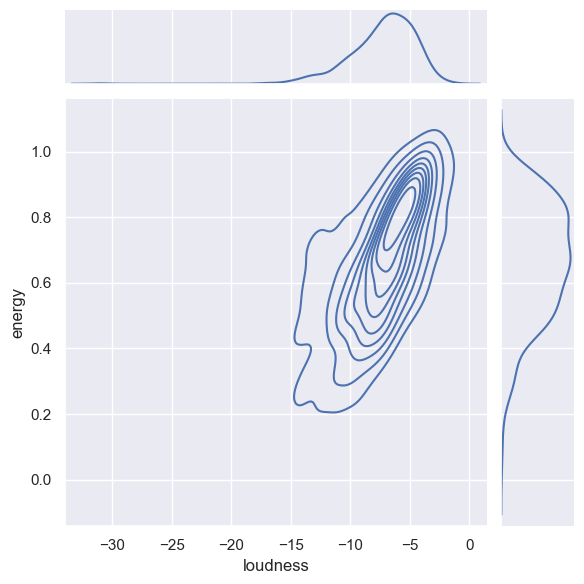

In [34]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.jointplot(data=df_historical, x="loudness", y="energy", kind="kde")

In [38]:
angles=np.linspace(0,2*np.pi,len(df_mean), endpoint=False)
print(angles)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


In [39]:
angles=np.concatenate((angles,[angles[0]]))
print(angles)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 0.        ]


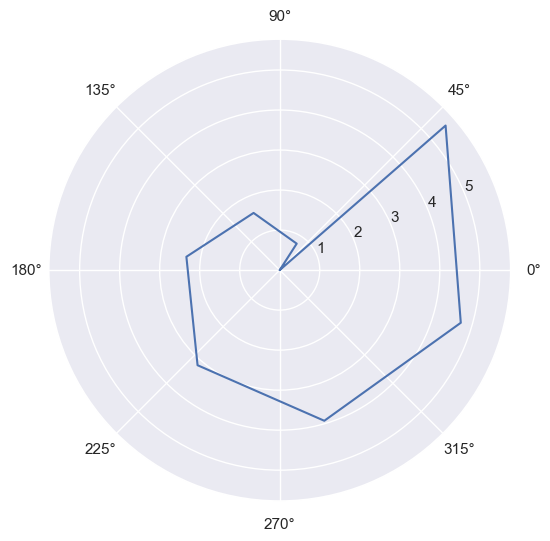

In [41]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
ax.plot(angles)
plt.show()

In [48]:


fig = px.line_polar(df_mean, r="index",theta="index",line_close=True,template="plotly_dark")
fig.update_traces(fill='toself')
fig.update_layout(font_size=15)
fig.show()

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
df_historical

,track_name,album,track_id,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,duration_ms,tempo_str
0,Fresas con nata,Fresas con nata,48sq0JdNEbXhQTdAorTzC9,Ayax y Prok,0,0.824,0.617,8,-10.429,1,0.4370,0.126000,0.000000,0.1050,0.814,115.899,2018,210.0,medium
1,Amén,Pa'l Coche,1PLxoOKyLKqicE5ErhrzkF,Cruz Cafuné,42,0.685,0.480,2,-10.174,0,0.3350,0.130000,0.000000,0.1190,0.440,183.973,2018,191.0,high
2,Llórame - Acústico,Llórame (Acústico),1eFx4b7oW6VGtxGBz6aTrW,Zetazen,45,0.537,0.468,6,-8.551,1,0.0606,0.946000,0.000000,0.0980,0.306,102.725,2018,233.0,low
3,Nit salvatge,Nit salvatge,3TwSlfvFPPoz0K1yL1Ujxn,Smoking Souls,40,0.587,0.675,10,-6.734,1,0.0313,0.000089,0.000030,0.0984,0.382,109.978,2018,260.0,low
4,Amorfoda,Amorfoda,3ITvHA9zhZZdBJsOsAUegF,Bad Bunny,0,0.742,0.432,9,-7.539,0,0.0615,0.984000,0.000058,0.0796,0.252,148.005,2018,156.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Rockadown Subway Session,Rockadown Subway Session,3bdhZxL276JwNlNsQgu51s,Vanupié,0,0.650,0.648,6,-6.694,0,0.3390,0.525000,0.000000,0.6830,0.792,140.607,2022,214.0,medium
546,Je veux,Zaz,734dz1YaFITwawPpM25fSt,Zaz,68,0.525,0.807,2,-6.366,0,0.0725,0.251000,0.000000,0.0504,0.741,155.397,2022,216.0,medium
547,Redemption Song,Uprising,26PwuMotZqcczKLHi4Htz3,Bob Marley & The Wailers,69,0.671,0.256,7,-10.743,1,0.0387,0.608000,0.000000,0.0737,0.694,115.871,2022,234.0,medium
548,Last Kiss,Last Kiss,0QnONzv3TvHAWk294h6DaQ,Pearl Jam,71,0.622,0.692,7,-6.970,1,0.0276,0.363000,0.000158,0.1930,0.774,112.053,2022,195.0,low


In [54]:
df_mean
df_historical['acousticness'] = df_historical['acousticness'] / df_historical['acousticness'].max()
df_historical['danceability'] = df_historical['danceability'] / df_historical['danceability'].max()
df_historical['duration_ms'] = df_historical['duration_ms'] / df_historical['duration_ms'].max()
df_historical['energy'] = df_historical['energy'] / df_historical['energy'].max()
df_historical['instrumentalness'] = df_historical['instrumentalness'] / df_historical['instrumentalness'].max()
df_historical['liveness'] = df_historical['liveness'] / df_historical['liveness'].max()
df_historical['speechiness'] = df_historical['speechiness'] / df_historical['speechiness'].max()
df_historical['tempo'] = df_historical['tempo'] / df_historical['tempo'].max()
df_historical['valence'] = df_historical['valence'] / df_historical['valence'].max()
df_historical['popularity'] = df_historical['popularity'] / df_historical['popularity'].max()
df_historical['loudness'] = df_historical['loudness'] / df_historical['loudness'].min()   #min because it is a negative value
df_historical['year_playlist'] = df_historical['year_playlist'].astype(str)
df_historical.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.391251,0.704508,0.678521,5.280899,4.972368,0.614232,0.182353,0.312070,0.015134,0.213634,0.574547,0.573509,0.251697
std,0.280424,0.154155,0.180404,3.570744,1.907538,0.487233,0.151694,0.279526,0.090867,0.166396,0.233568,0.147722,0.086278
min,0.000000,0.178228,0.044422,0.000000,1.000000,0.000000,0.027594,0.000014,0.000000,0.033333,0.061698,0.346534,0.071829
25%,0.010309,0.596852,0.550921,2.000000,3.640411,0.000000,0.055673,0.058511,0.000000,0.116786,0.371894,0.454654,0.200056
50%,0.448454,0.716115,0.689867,5.000000,4.673973,1.000000,0.120867,0.231707,0.000000,0.142857,0.580745,0.531115,0.237935
75%,0.597938,0.818303,0.825998,9.000000,5.907363,1.000000,0.288769,0.522358,0.000044,0.250000,0.767081,0.677636,0.282828
max,1.000000,1.000000,1.000000,11.000000,21.261644,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
